In [1]:
import pathlib
import pylab as plt
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('white')

In [3]:
PRJ='PRJNA573298'
DATA_PATH=f'/mnt/1TB_0/Data/Assembly/{PRJ}/'
PLOT_PATH=DATA_PATH+'general_plots/'
ITERATION='2'

In [4]:
df=pd.read_csv(PLOT_PATH+'Pangolin_Data_bowtie2_alignment_key.csv')

In [5]:
df.head(n=20)

,BioProject,SRA,MT121216.1 Pangolin coronavirus isolate MP789,MW505906.1 Pangolin respirovirus isolate M5,NC_001479.1 Encephalomyocarditis virus,NC_001669.1 Simian virus 40 complete genome,NC_001702.1 Murine type C retrovirus,NC_003287.2 Enterobacteria phage M13,NC_006430.1 Parainfluenza virus 5,NC_029853.1 Mus musculus mobilized endogenous polytropic provirus clone 15 truncated gag-pol polyprotein (gag) and envelope protein (env) genes,NC_031450.1 Parus major densovirus isolate PmDNV-JL,NC_042057.1 Enterobacteria phage DE3,NC_043382.1 Snyder-Theilen feline sarcoma virus genomic sequence,NC_044948.1 UNVERIFIED: African swine fever virus isolate Odintsovo_02/14
0,PRJNA573298,SRR10168373,NaN,2.0,3780.0,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN
1,PRJNA573298,SRR10168374,4.0,4.0,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PRJNA573298,SRR10168375,7.0,145.0,20.0,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN
3,PRJNA573298,SRR10168376,35.0,15011.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,PRJNA573298,SRR10168377,984.0,4306.0,2.0,NaN,NaN,NaN,NaN,2.0,26.0,NaN,NaN,NaN
5,PRJNA573298,SRR10168378,258.0,1293.0,7.0,NaN,18.0,NaN,NaN,57.0,104.0,NaN,NaN,NaN
6,PRJNA573298,SRR10168379,NaN,16243.0,2471.0,NaN,2.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN
7,PRJNA573298,SRR10168380,NaN,NaN,2562.0,NaN,NaN,NaN,NaN,3.0,214.0,NaN,NaN,NaN
8,PRJNA573298,SRR10168381,NaN,66.0,2135.0,NaN,13.0,NaN,NaN,48.0,NaN,NaN,NaN,NaN
9,PRJNA573298,SRR10168382,NaN,NaN,3046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cols=df.columns

In [7]:
cols

Index(['BioProject', 'SRA', 'MT121216.1 Pangolin coronavirus isolate MP789',
       'MW505906.1 Pangolin respirovirus isolate M5',
       'NC_001479.1 Encephalomyocarditis virus',
       'NC_001669.1 Simian virus 40 complete genome',
       'NC_001702.1 Murine type C retrovirus ',
       'NC_003287.2 Enterobacteria phage M13',
       'NC_006430.1 Parainfluenza virus 5',
       'NC_029853.1 Mus musculus mobilized endogenous polytropic provirus clone 15 truncated gag-pol polyprotein (gag) and envelope protein (env) genes',
       'NC_031450.1 Parus major densovirus isolate PmDNV-JL',
       'NC_042057.1 Enterobacteria phage DE3',
       'NC_043382.1 Snyder-Theilen feline sarcoma virus genomic sequence',
       'NC_044948.1 UNVERIFIED: African swine fever virus isolate Odintsovo_02/14'],
      dtype='object')

In [8]:
asc_only=[]
for c in cols:
    asc_only.append(c.split(' ')[0])

In [9]:
df.columns=asc_only

In [10]:
df=df.fillna(0)

In [11]:
df_PRJNA573298=df[df["BioProject"] == 'PRJNA573298']
df_PRJNA606875=df[df["BioProject"] == 'PRJNA606875']
df_PRJNA607174=df[df["BioProject"] == 'PRJNA607174']
df_PRJNA686836=df[df["BioProject"] == 'PRJNA686836']

In [12]:
df_accessions=pd.read_csv(PLOT_PATH+'04_Accessions.tsv', sep='\t')
df_accessions['Accession']=df_accessions['Accession'].str.strip()

In [13]:
def get_accessions(x_labels, df_accessions):
    x_codes=[]
    for accession in x_labels:
        if accession=='Influenza':
            x_codes.append(accession)
        else:
            x_codes.append(df_accessions.loc[df_accessions['Accession'] == accession, 'Code'].values[0])
    return x_codes

### box plots

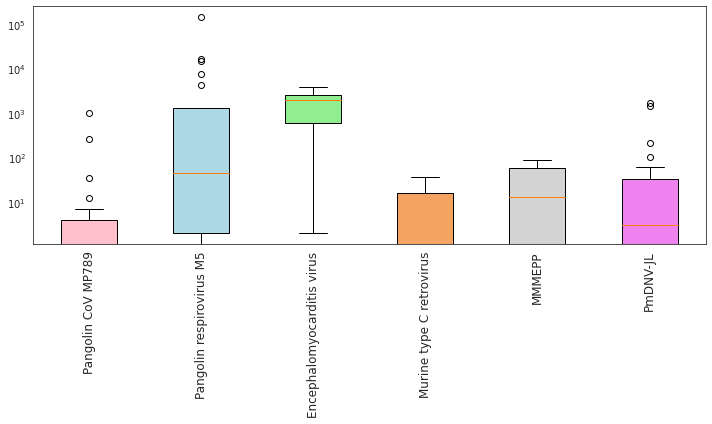

In [14]:
#viruses=['MT121216.1','MW505906.1','NC_001479.1','NC_001702.1','NC_029853.1','NC_031450.1']
viruses=['Pangolin CoV MP789','Pangolin respirovirus M5','Encephalomyocarditis virus',\
         'Murine type C retrovirus','MMMEPP','PmDNV-JL']
 
pcov = df_PRJNA573298['MT121216.1']
sendai = df_PRJNA573298['MW505906.1']
encephalo = df_PRJNA573298['NC_001479.1']
murinec= df_PRJNA573298['NC_001702.1']
mus_prov_15=df_PRJNA573298['NC_029853.1']
parus_major=df_PRJNA573298['NC_031450.1']


data = [pcov, sendai, encephalo, murinec, mus_prov_15, parus_major]
 
fig, ax = plt.subplots(figsize =(10, 6))
colors = ['pink', 'lightblue', 'lightgreen','sandybrown','lightgrey','violet']
 
bp = ax.boxplot(x=data, patch_artist=True)
ax.set_xticklabels(viruses, rotation='vertical', fontsize=12)
ax.set_yscale('log')

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
plt.tight_layout()
plt.savefig(PLOT_PATH+f"PRJNA573298_viruses_bowtie2_aligned_shortlist_boxplot_{ITERATION}.png")
plt.show()

In [15]:
df_PRJNA607174.head(n=20)

,BioProject,SRA,MT121216.1,MW505906.1,NC_001479.1,NC_001669.1,NC_001702.1,NC_003287.2,NC_006430.1,NC_029853.1,NC_031450.1,NC_042057.1,NC_043382.1,NC_044948.1
28,PRJNA607174,SRR11119759,605.0,3405.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,295.0
29,PRJNA607174,SRR11119760,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,34.0,0.0,333.0
30,PRJNA607174,SRR11119761,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,587.0
31,PRJNA607174,SRR11119762,60.0,60757.0,0.0,18.0,0.0,1350.0,283.0,9.0,0.0,4723.0,0.0,122.0
32,PRJNA607174,SRR11119763,10.0,246.0,0.0,210.0,0.0,350.0,1136.0,3.0,0.0,57.0,0.0,456.0
33,PRJNA607174,SRR11119764,0.0,58.0,0.0,215.0,0.0,490.0,536.0,0.0,89.0,189.0,0.0,314.0
34,PRJNA607174,SRR11119765,0.0,25.0,0.0,41.0,0.0,81.0,442.0,12.0,4.0,58.0,0.0,189.0
35,PRJNA607174,SRR11119766,10.0,644.0,0.0,25.0,0.0,26.0,223.0,8.0,0.0,837.0,0.0,2018.0
36,PRJNA607174,SRR11119767,0.0,55.0,0.0,131844.0,0.0,214163.0,8922.0,9.0,0.0,100304.0,0.0,459409.0
37,PRJNA607174,SRR12053850,6244.0,12.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,160.0,0.0,68.0


In [16]:
df_PRJNA607174=pd.read_csv('/mnt/1TB_0/Data/Assembly/PRJNA607174/general_plots/PRJNA607174_3_reads_alignment_counts.csv')

In [17]:
cols=df_PRJNA607174.columns
asc_only=[]
for c in cols:
    asc_only.append(c.split(' ')[0])

In [18]:
df_PRJNA607174.columns=asc_only
df_PRJNA607174.head()

,accession,MT121216.1,MW505906.1,NC_001669.1,NC_001802.1,NC_003287.2,NC_005947.1,NC_006430.1,NC_015586.1,NC_024909.1,...,NC_029853.1,NC_030141.1,NC_031450.1,NC_032852.1,NC_038399.1,NC_042057.1,NC_043426.1,NC_044948.1,Analysis,Alignment
0,SRR11119759,605,3405,0,0,0,0,0,0,0,...,6,11,0,701,45,4,0,295,aligned reads,bowtie2
1,SRR11119760,0,4,0,0,0,0,0,0,0,...,2,6,0,610,39,34,0,333,aligned reads,bowtie2
2,SRR11119761,2,2,0,0,0,0,0,5,0,...,0,15,0,611,31,1,0,587,aligned reads,bowtie2
3,SRR11119762,60,60757,18,0,1350,0,283,0,0,...,9,0,0,0,16,4723,2,122,aligned reads,bowtie2
4,SRR11119763,10,246,210,1,350,0,1136,0,0,...,3,0,0,0,48,57,0,456,aligned reads,bowtie2


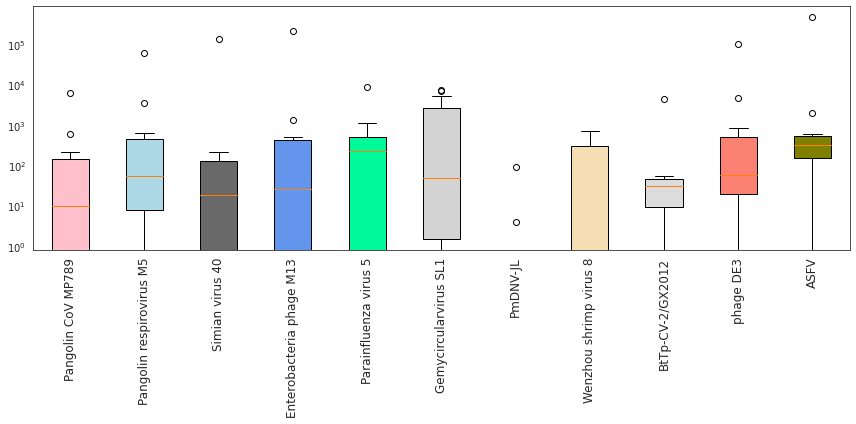

In [19]:
viruses=['MT121216.1','MW505906.1','NC_001669.1',\
'NC_003287.2','NC_006430.1','NC_026818.1',\
'NC_031450.1','NC_032852.1','NC_038399.1',\
         'NC_042057.1','NC_044948.1']
viruses=['Pangolin CoV MP789','Pangolin respirovirus M5','Simian virus 40',\
         'Enterobacteria phage M13','Parainfluenza virus 5','Gemycircularvirus SL1',\
        'PmDNV-JL','Wenzhou shrimp virus 8','BtTp-CV-2/GX2012',\
        'phage DE3','ASFV']
 
pcov = df_PRJNA607174['MT121216.1']
sendai = df_PRJNA607174['MW505906.1']
sv40 = df_PRJNA607174['NC_001669.1']
m13= df_PRJNA607174['NC_003287.2']
para5= df_PRJNA607174['NC_006430.1']
gemy_sl1=df_PRJNA607174['NC_026818.1']
parus_major=df_PRJNA607174['NC_031450.1']
wenzhou=df_PRJNA607174['NC_032852.1']
bat_cyclo=df_PRJNA607174['NC_038399.1']
de3=df_PRJNA607174['NC_042057.1']
asfv=df_PRJNA607174['NC_044948.1']


data = [pcov, sendai, sv40, m13, para5, gemy_sl1, parus_major, wenzhou, bat_cyclo, de3, asfv]
 
fig, ax = plt.subplots(figsize =(12,6))
colors = ['pink', 'lightblue', 'dimgrey', 'cornflowerblue', 'mediumspringgreen','lightgrey','violet','wheat','gainsboro','salmon','olive']
 
bp = ax.boxplot(x=data, patch_artist=True)
ax.set_xticklabels(viruses, rotation='vertical', fontsize=12)
ax.set_yscale('log')

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
plt.tight_layout()
plt.savefig(PLOT_PATH+f"PRJNA607174_viruses_bowtie2_aligned_shortlist_boxplot_{ITERATION}.png")
plt.show()

### ratios

In [20]:
mp789=df[df["MT121216.1"] > 0]

In [21]:
mp789_PRJNA573298=mp789[mp789["BioProject"] == 'PRJNA573298']
mp789_PRJNA606875=mp789[mp789["BioProject"] == 'PRJNA606875']
mp789_PRJNA607174=mp789[mp789["BioProject"] == 'PRJNA607174']
mp789_PRJNA686836=mp789[mp789["BioProject"] == 'PRJNA686836']

In [22]:
mp789_PRJNA573298.drop(columns=['SRA','BioProject'], inplace=True)
mp789_PRJNA606875.drop(columns=['SRA','BioProject'], inplace=True)
mp789_PRJNA607174.drop(columns=['SRA','BioProject'], inplace=True)
mp789_PRJNA686836.drop(columns=['SRA','BioProject'], inplace=True)

In [23]:
mp789_PRJNA573298=mp789_PRJNA573298.fillna(0)

In [24]:
mp789_PRJNA573298.shape[0]

6

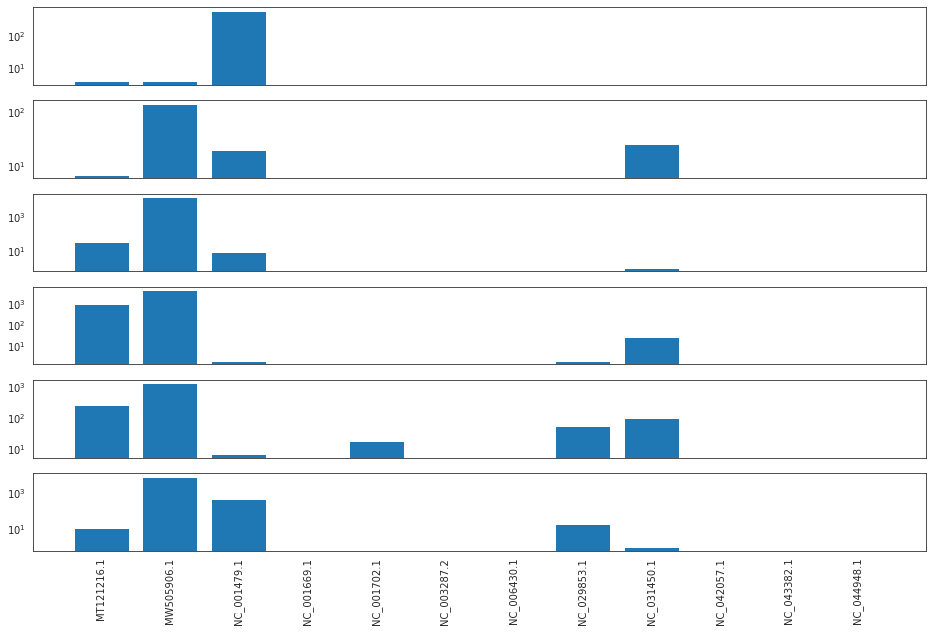

In [25]:
num_plots=mp789_PRJNA573298.shape[0]
cols=mp789_PRJNA573298.columns
fig, axs = plt.subplots(num_plots, sharex=True, figsize=(16,10))
for ro in range(num_plots):
    row = mp789_PRJNA573298.iloc[ro]
    r=row.to_list()
    axs[ro].bar(cols, r)
    axs[ro].tick_params(axis='x', rotation=90)
    axs[ro].set_yscale('log')